Importing Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

Load Dataset

In [56]:
train_location = r"C:\Users\DELL\Desktop\CodSoft\Task1_MoviePrediction\GenreClassificationDataset\train_data.txt"

# pd.read_csv() - This function is used to read data from a CSV file and create a DataFrame in Pandas.
# train_location (parameter): The file path to the CSV file. It's set as a raw string (prefixed with 'r') to avoid issues with backslashes.
# sep (parameter): The separator used in the CSV file to distinguish between columns. In your case, it's set to ':::'.
# names (parameter): A list of column names to be assigned to the DataFrame.
# engine (parameter): Specifies the parsing engine to be used. In your code, 'python' engine is used to handle potential parsing issues.
train_data = pd.read_csv(train_location, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

# describe()
# This function is used to generate various summary statistics of the DataFrame, 
# such as count, mean, standard deviation, minimum, and maximum for numerical columns. 
# The output is a DataFrame with statistics for each column.
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [57]:
# The info() method prints information about the DataFrame. 
# The information contains the number of columns, column labels, column data types, memory usage, range index, 
# and the number of cells in each column (non-null values).
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [58]:
# train_data.isnull().sum() is used to count the number of missing values in each column of the train_data dataframe.
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [59]:
# Load the test data
test_location = r"C:\Users\DELL\Desktop\CodSoft\Task1_MoviePrediction\GenreClassificationDataset\test_data.txt"
test_data = pd.read_csv(test_location, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

# test_data.head(): This line of code is used to display the first few rows of the test_data dataframe.
# The head() method is a Pandas function that, by default, returns the first 5 rows of the dataframe.
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


EDA & Visualization

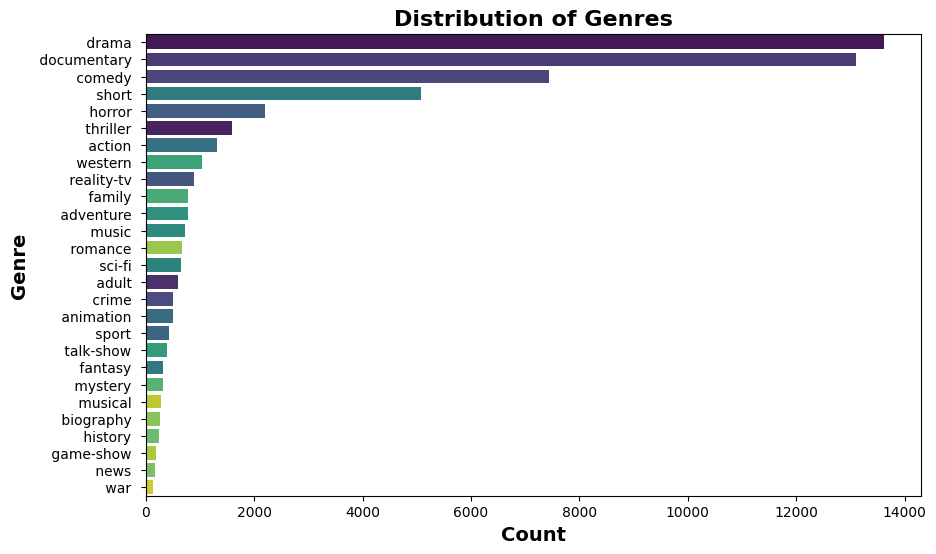

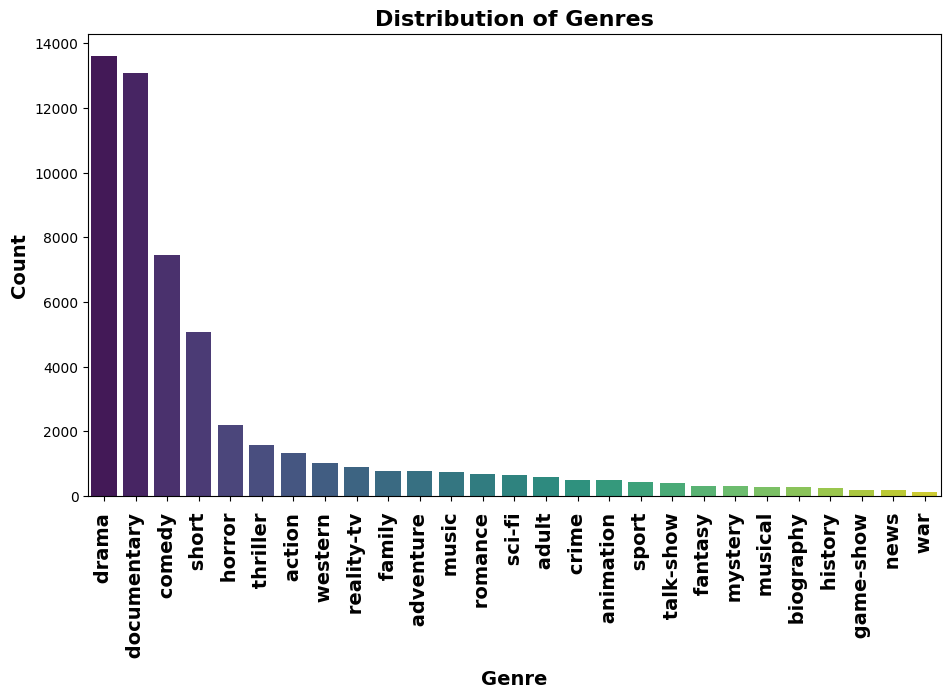

In [60]:
plt.figure(figsize=(10, 6))

sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis', hue='Genre', legend=False)
# y=counts: Sets the counts as the y-axis variable.
# palette='viridis': Specifies the color palette.
# hue=counts.index: Uses the genre names as the hue variable, which separates the bars by genre.

plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.show()


plt.figure(figsize=(11, 6))

counts = train_data['Genre'].value_counts()
# counts = train_data['Genre'].value_counts(): Calculates the counts of each genre in the 'Genre' column and stores it in the counts variable.

sns.barplot(x=counts.index, y=counts, palette='viridis', hue=counts.index, legend=False)
# sns.barplot(): This function creates a bar plot.
# x=counts.index: Sets the 'Genre' as the x-axis variable and uses the genre names as labels.

plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()


Data Preprocessing and Text Cleaning

In [61]:
# The Lancaster Stemmer is one of several algorithms used for stemming. 
# It's known for its aggressive approach to word reduction, 
# which can sometimes lead to more aggressive stemming than other algorithms like the Porter Stemmer. 
# The Lancaster Stemmer is based on rules and heuristics, and it's relatively simple and efficient.
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)



Detailed Preprocessing

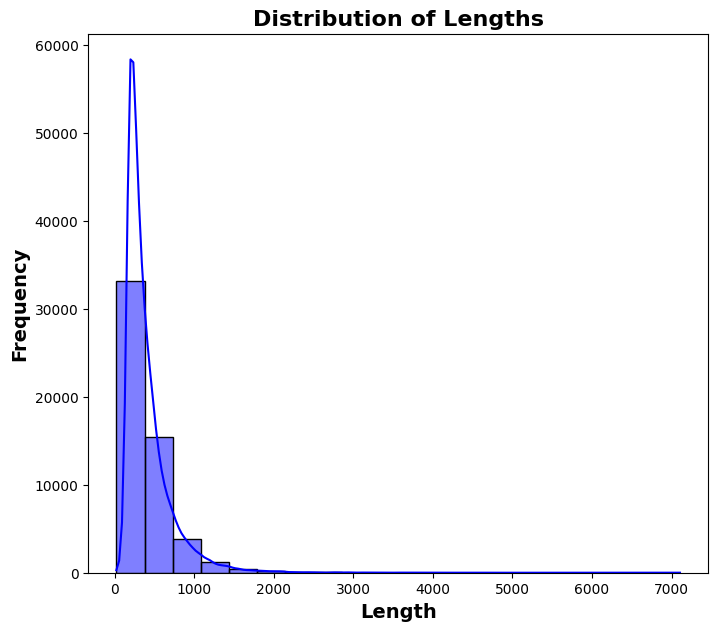

In [62]:
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# train_data['Text_cleaning'].apply(len): This line of code calculates the length of the text in each row of the 'Text_cleaning' column 
# and stores the results in a new column called 'length_Text_cleaning' within the 'train_data' dataframe. 

plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
# This line creates a histogram plot of the text lengths using Seaborn's histplot function. 
# It uses the 'train_data' dataframe as the data source,
# the 'length_Text_cleaning' column as the x-axis variable,
# specifies the number of bins (in this case, 20), 
# adds a kernel density estimate (KDE) curve to visualize the distribution more smoothly, and sets the color of the plot to blue.

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

TF-ID Text Vectorization


In [63]:
# The TF-IDF vector for a document is obtained by multiplying 
# the TF of each term in the document by the IDF of the term
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

Split Data and Train a Model (Naive Bayes)

In [64]:
# X is set to X_train, which is the TF-IDF representation of the training text data.
# y is set to train_data['Genre'], which presumably contains the target labels (genres) for the training data.
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
#  The Multinomial Naive Bayes classifier assumes that the features (e.g., words in a document) are generated from a multinomial distribution. 
# In the Multinomial distribution, the random experiment results in a discrete number of possible outcomes. 
# Each outcome is mutually exclusive and belongs to one of several categories or classes.
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred, zero_division=0.0))

Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

Test Data Predictions

In [65]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)


          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    